# Beams - structural beams

This notebook shows how to use Beam elements model cantilever beams, how to get the results and how those results compare to theory.

A "Beam" in DAVE consists of a number of discrete segments and has a different formulation than the beams typically found in FEM packages.

In [14]:
from DAVE import *
s = Scene();

Beams are elastic nodes that can be created between axis systems.

In [15]:
left = s.new_axis("left")
right = s.new_axis("right")
beam = s.new_beam("beam", nodeA=left, nodeB = right,
                        EA = 1000,
                        EIy = 1e5, EIz = 1e5, GIp = 1e3,
                        L=10,
                        mass = 0,
                        n_segments=20)
right.set_free()
s.solve_statics()

Solved to 7.282021978066402e-11.


True

In [16]:
from DAVE.jupyter import *;

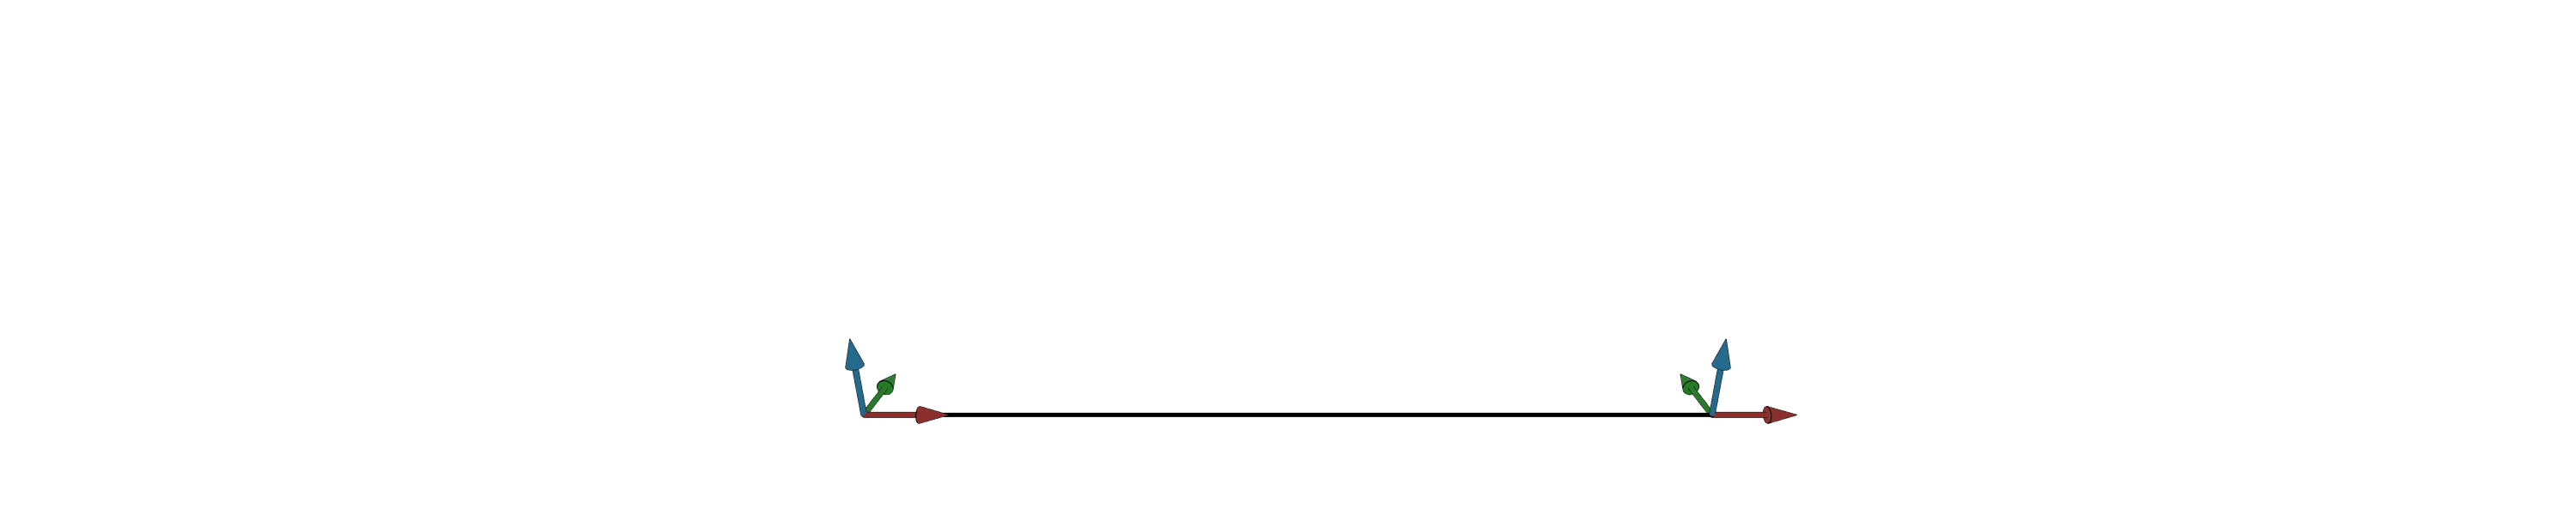

In [17]:
show(s, camera_pos=(5,-10,6), lookat = (5,0,2), width=1000, height = 200)

A Beam node is rigidly fixed to the axis systems at its ends. It is fixed in the positive X-direction, so it departs from node A along the X-axis and arrives at ndoe B from the negative X-direction.

At the momement we have a massless beam with its left side fixed (axis system "left" is fixed) and its right size free (the right end of the beam is fixed to axis system "right", but "right" is not connected to anything and is free to move).

This is one of those cases that frequently occur in textbooks and for which we can easily check the results.

![cantilever.png](cantilever.png)

First place a point on the right side so that we can apply a force:

In [18]:
s.new_point("point", parent = right)
force = s.new_force("force", parent = "point")

### Cantilever beam with a force

In [19]:
force.force = (0,0,-100)

In [20]:
s.solve_statics()

Solved to 6.977842303967918e-09.


True

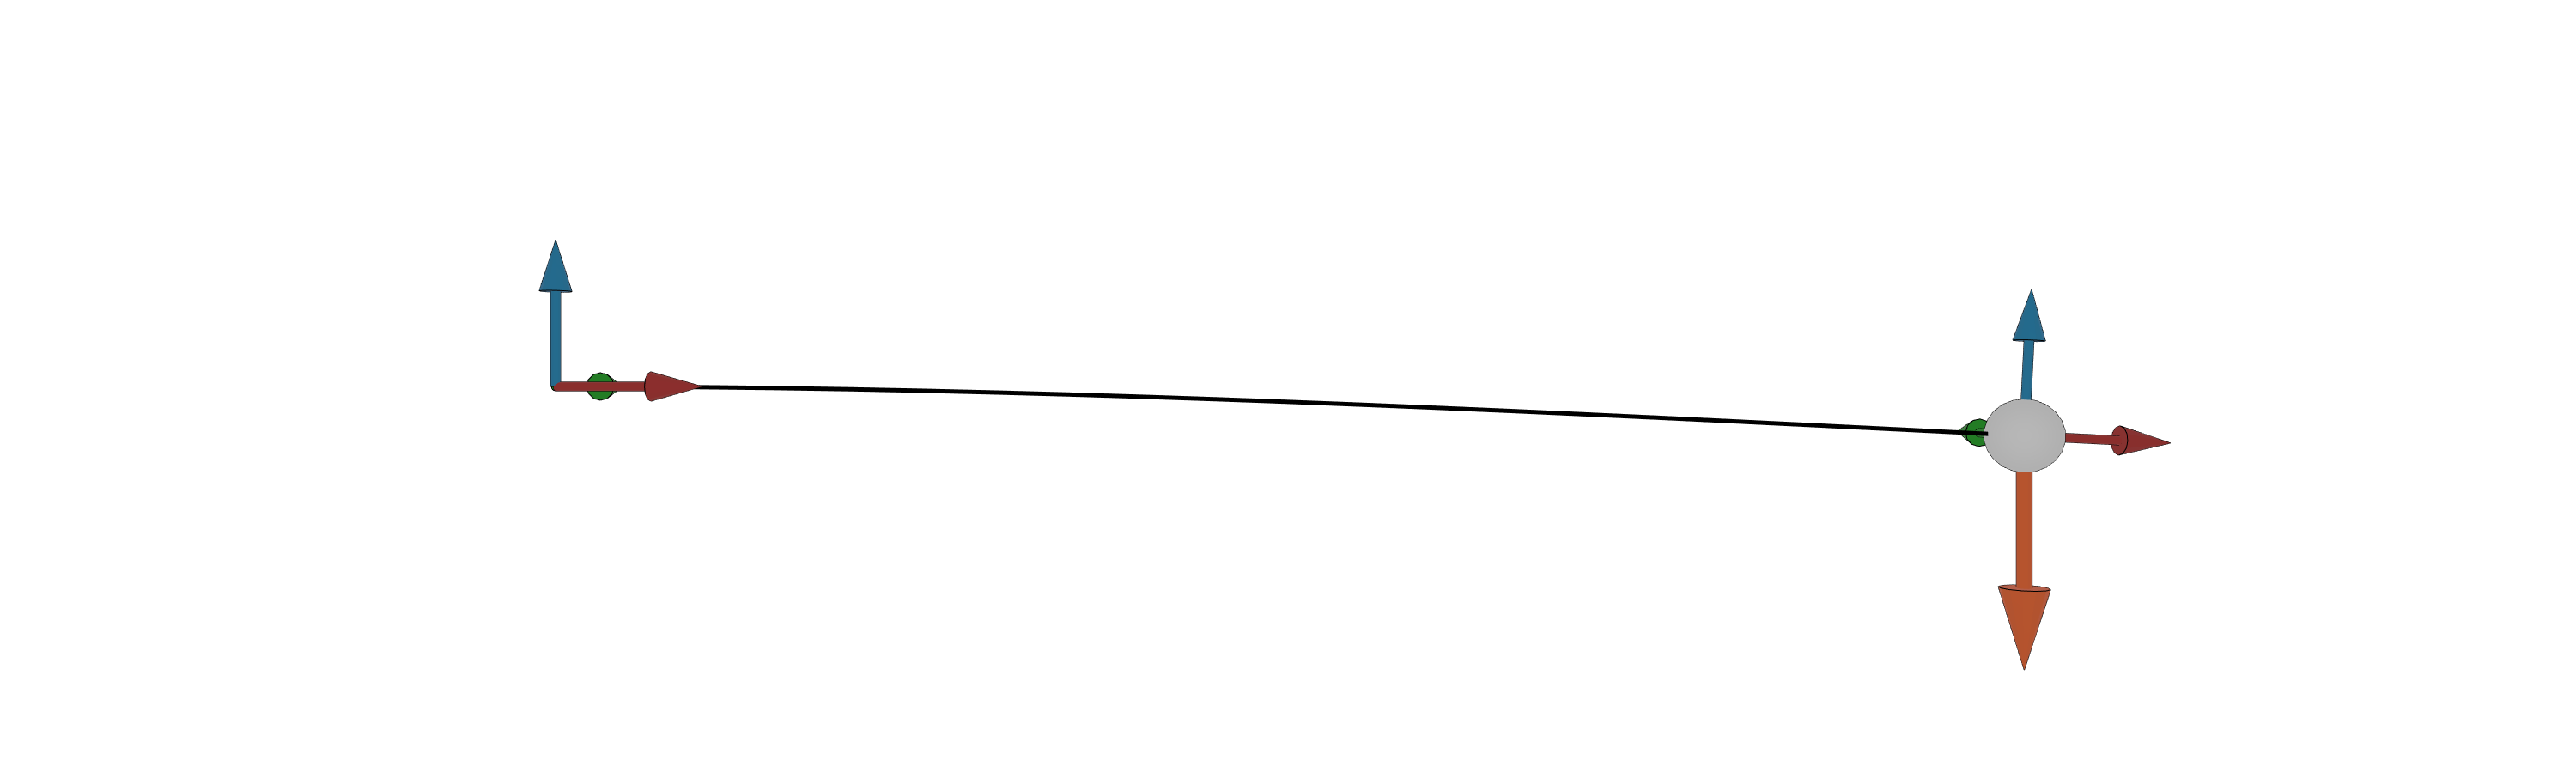

In [21]:
show(s, camera_pos=(5,-10,0), lookat = (5,0,0), width=1000, height = 300)

Theory tells us that the deflection and rotation of the right end should be:

$\delta = -PL^3 / 3EI$

and

$\Theta = PL^2 / 2EI$

Get the values from the model:

In [22]:
L = beam.L
EI = beam.EIy
P = -force.force[2]

And calculate their values

The deflection is the vertical displacement of the axis system on the right side of the beam:

In [23]:
right.z

-0.3360465308499825

In [24]:
-P*L**3 / (3*EI)

-0.3333333333333333

Theta is the slope. The slope can be calculated from the rotation of the axis system, but it is also available as "tilt", which is a percentage.

In [25]:
right.tilt_y / 100

0.050141616132403796

In [26]:
P*L**2 / (2*EI)

0.05

It is also possible to obtain the forces in the beam.

The moments are available at the nodes.

In [27]:
import matplotlib.pyplot as plt

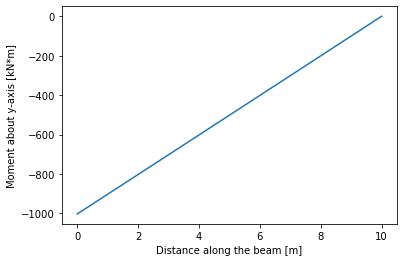

In [28]:
plt.plot(beam.X_nodes, beam.bending[:,1])
plt.xlabel('Distance along the beam [m]')
plt.ylabel('Moment about y-axis [kN*m]');

## Cantilever with moment

We can do the same with a moment

In [29]:
force.force = (0,0,0)
force.moment = (0,1000,0)

In [30]:
s.solve_statics()

Solved to 6.037157590706898e-05.


True

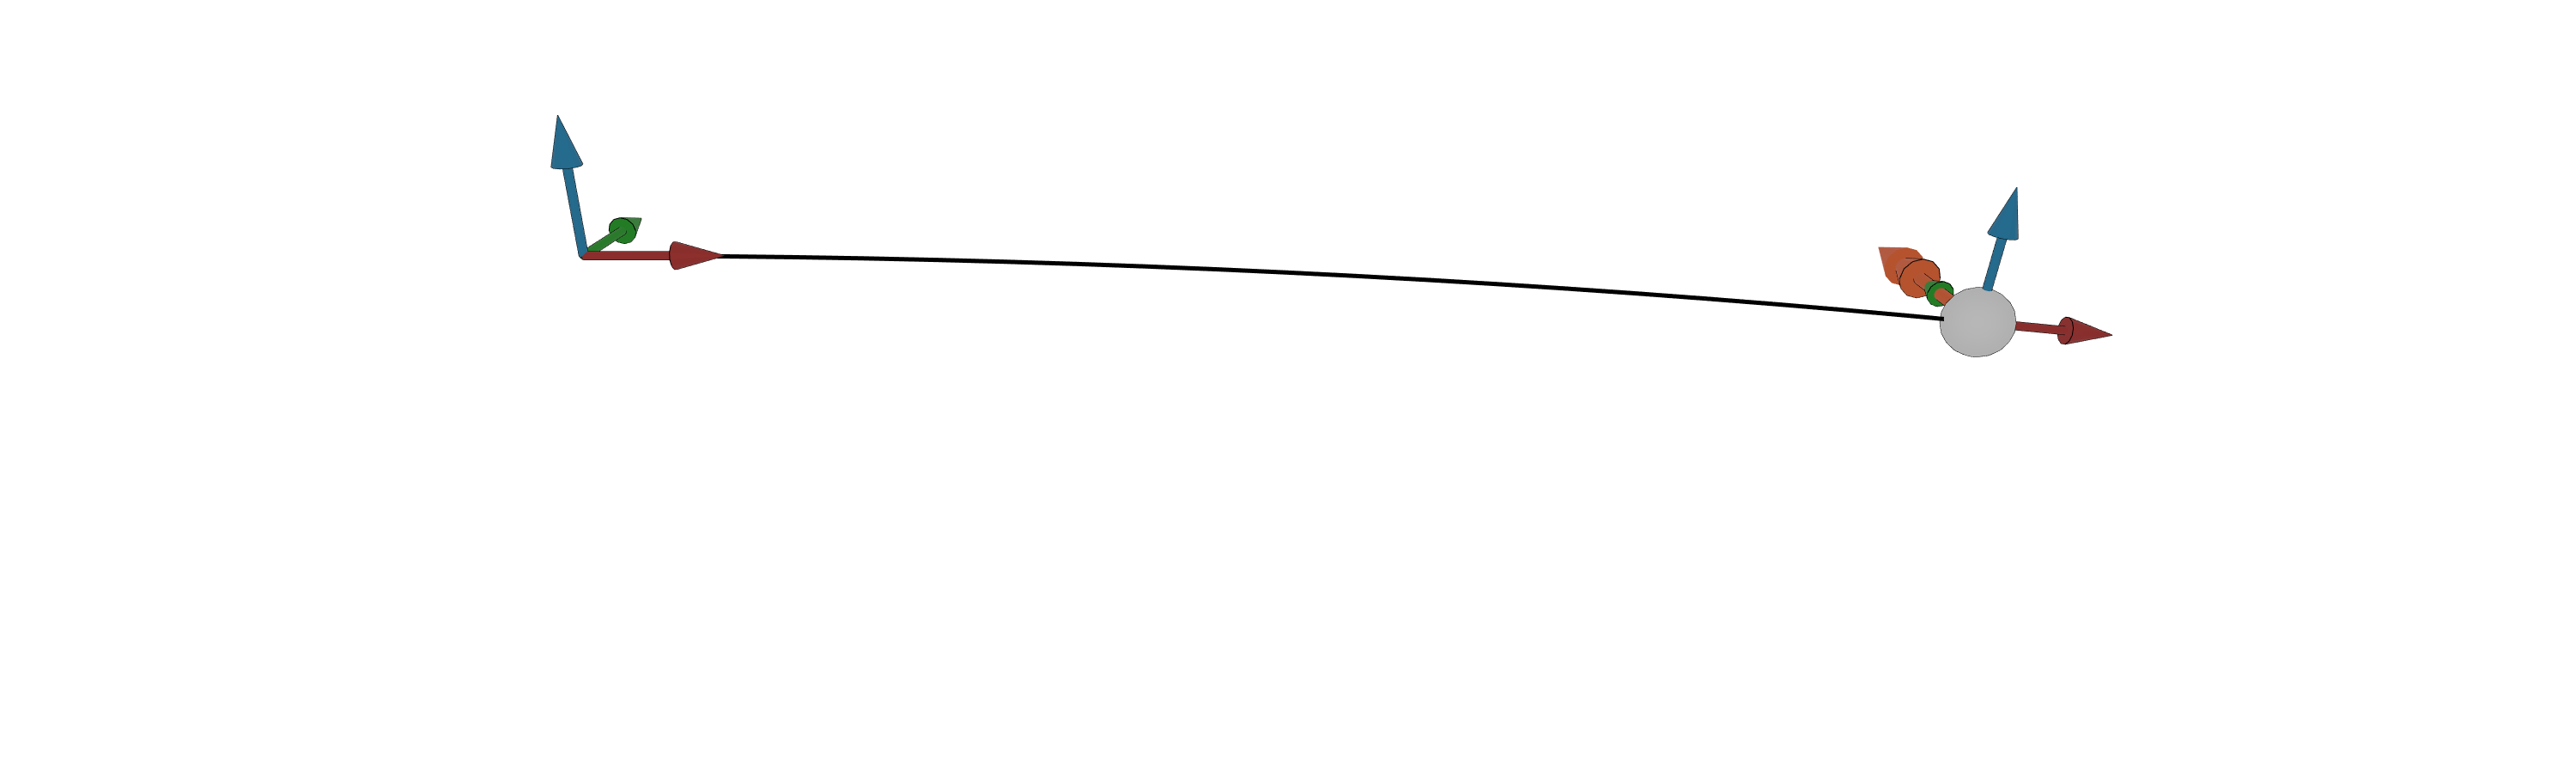

In [31]:
show(s, camera_pos=(5,-10,3), lookat = (5,0,-1), width=1000, height = 300)

Theory tells us that the deflection and rotation of the right end should be:

$\delta = ML^2 / 2EI$

and

$\Theta = ML / EI$

Get the values from the model:

In [32]:
M = force.moment[1]  # moment about Y-axis

In [33]:
M*L**2 / (2*EI)

0.5

In [34]:
-right.z

0.49958399335922377

In [35]:
M*L / EI

0.1

In [36]:
right.tilt_y / 100

0.09983341680275604

## Tension and torsion

Beam can also take tension and torsion.

In [37]:
force.force = (100,0,0)
force.moment = (100,0,0)

In [38]:
s.solve_statics()

Solved to 3.2689941475427822e-09.


True

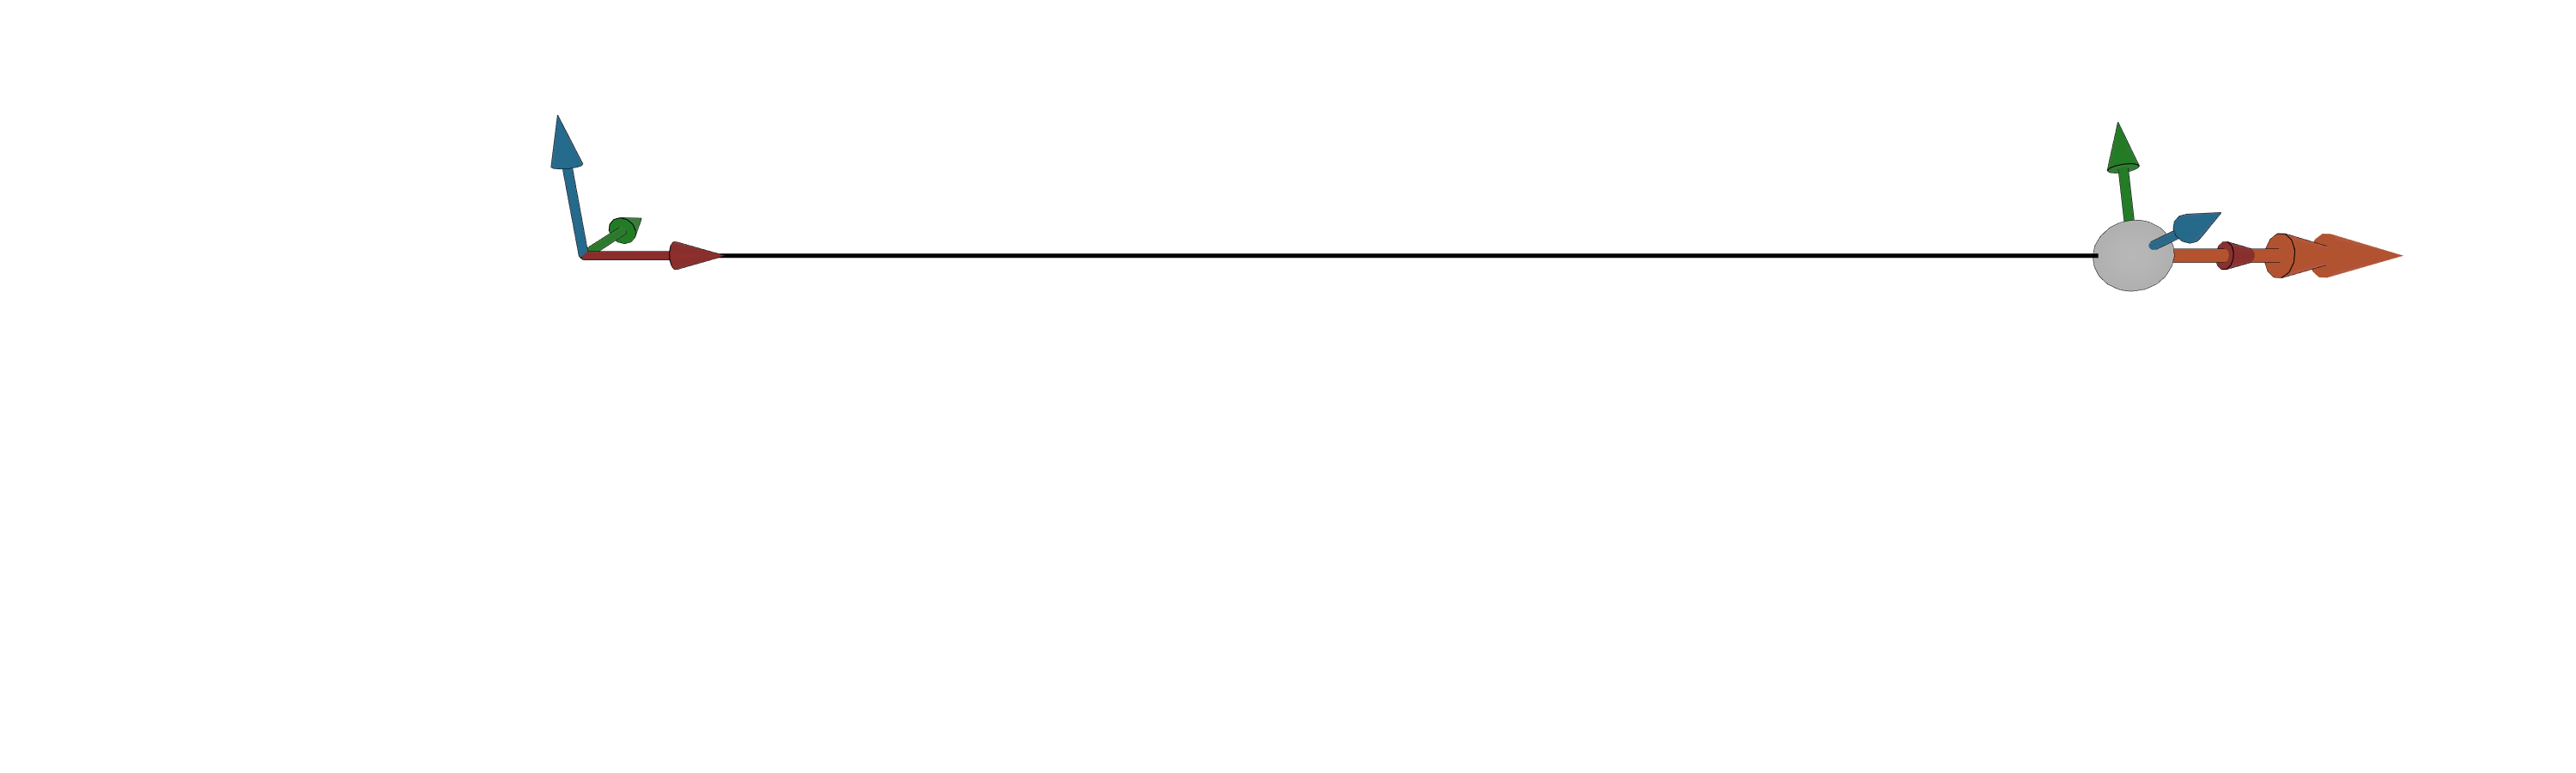

In [39]:
show(s, camera_pos=(5,-10,3), lookat = (5,0,-1), width=1000, height = 300)

Tension and torsion forces in the beam are available not at the nodes but at the centers for the beam segments.

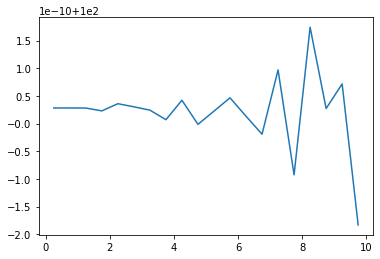

In [40]:
plt.plot(beam.X_midpoints, beam.torsion);

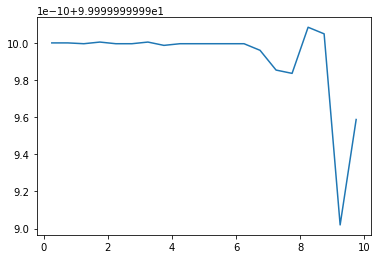

In [41]:
plt.plot(beam.X_midpoints, beam.tension);

**Now this looks horrible!** 

Fortunately this is just the way matplotlib displays data which is almost constant.

Looking at the data directly it appears to be comfortingly constant:

In [42]:
beam.torsion

[100.00000000002834,
 100.00000000002831,
 100.00000000002817,
 100.00000000002304,
 100.00000000003602,
 100.0000000000304,
 100.00000000002436,
 100.00000000000713,
 100.00000000004223,
 99.9999999999987,
 100.00000000002258,
 100.00000000004668,
 100.00000000001336,
 99.99999999998093,
 100.00000000009709,
 99.99999999990742,
 100.00000000017418,
 100.00000000002734,
 100.00000000007176,
 99.99999999981699]

In [43]:
import matplotlib
matplotlib.rcParams['axes.formatter.useoffset'] = False

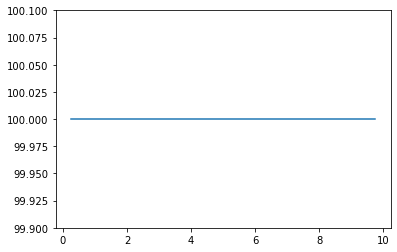

In [44]:
plt.plot(beam.X_midpoints, beam.torsion);
plt.ylim((99.9, 100.1));

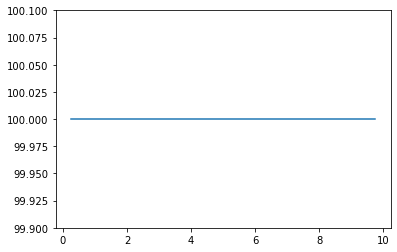

In [45]:
plt.plot(beam.X_midpoints, beam.tension);
plt.ylim((99.9, 100.1));

## Distributed load

Modelling a distributed load is not possible in this way. Loads can only be added at points.

To model a distributed load we would have to manually discretise the model and add discrete loads at each node.

But these is a shortcut that we can take: The beams can have a mass. We can use the mass to model a distributed load as gravity.

In [46]:
s.delete('force')

In [47]:
q = 10 # kN/m

In [48]:
beam.mass = beam.L * q  / 9.81

In [49]:
s.solve_statics()

Solved to 1.5907638499790266e-06.


True

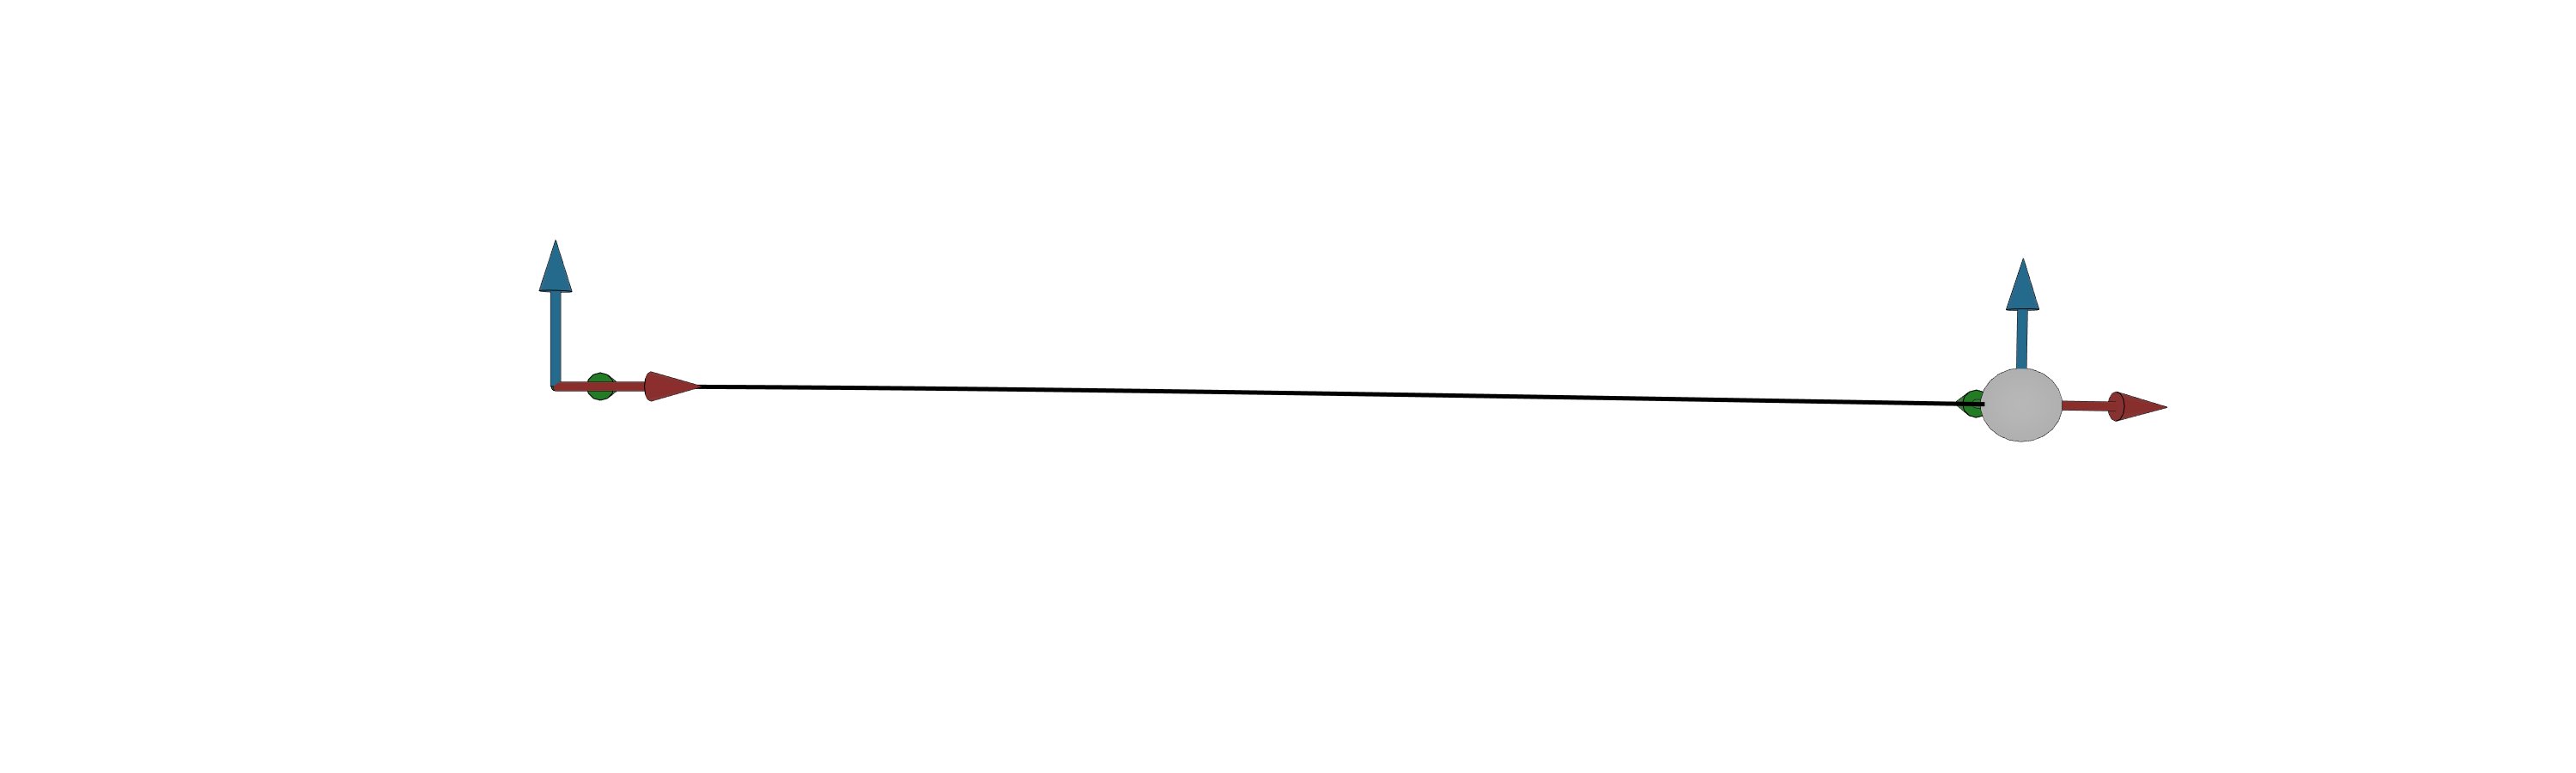

In [50]:
show(s, camera_pos=(5,-10,0), lookat = (5,0,0), width=1000, height = 300)

Theory tells us that the deflection and rotation of the right end should be:

$\delta = qL^4 / 8EI$

and

$\Theta = qL^3 / 6EI$

In [51]:
-q*L**4 / (8*EI)

-0.125

In [52]:
right.z

-0.12539340701707605

In [53]:
q*L**3 / (6*EI)

0.016666666666666666

In [54]:
right.tilt_y / 100

0.0166893748682577

## Large deflections

All the tests done so far were performed on small deflections. That is for a good reason. The Euler/Bernouilli beam theory is only applicable to small displacements. This is because in this theory the moment is derived from the deflection:

$d^2/dx^2(EI d^2w / dx^2) = q$

so the moment in the beam is proprtional to the change in slope. This is only valid for small changes.

The implementation in DAVE **is valid for large deflections**, it is just that the analytical formula used above are not.

## Number of segments

Beams use a discrete model (see theory https://davedocs.online/beams.html).

When a higher number of segments is used:
- The model become more accurate
- The solver becomes slower 
- (The numerical errors build up)

So the number of nodes should be selected with some caution. In general 20 seems to be a good number for beams although in some cases (for example pure tension or torsion) a single segment is just as good.

It is easy to use the "plot_effect" function in scene to check the effect of the number of segments.

Here we calculate the effect of the number of segments on the vertical position of the second end of the beam:

setting 1.0 results in -0.25043539491160244
setting 2.0 results in -0.15639089247829632
setting 3.0 results in -0.13899103913892805
setting 4.0 results in -0.13290404410813123
setting 5.0 results in -0.13008722674663012
setting 6.0 results in -0.12855725640297133
setting 7.0 results in -0.12763482038904622
setting 8.0 results in -0.12703611954399943
setting 9.0 results in -0.12662568542082253
setting 10.0 results in -0.12633209479032942
setting 11.0 results in -0.1261149619540067
setting 12.0 results in -0.12594964177272913
setting 13.0 results in -0.12582112539754506
setting 14.0 results in -0.1257191086942511
setting 15.0 results in -0.12563692008202257
setting 16.0 results in -0.12556951964354074
setting 17.0 results in -0.12551365800635883
setting 18.0 results in -0.12546684319151502
setting 19.0 results in -0.12542737738144474
setting 20.0 results in -0.12539358170433715
setting 21.0 results in -0.12536445730566537
setting 22.0 results in -0.12533910520139574
setting 23.0 results 

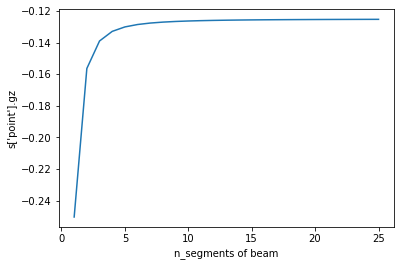

In [55]:
s.plot_effect(evaluate="s['point'].gz",
   change_property="n_segments",
    change_node="beam",
    start=1,
    to=25.0,
    steps=25);

-- end --